In [1]:
  ## Housing data Project
       ## Data Mining Project

  #importing all important libraries              
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("Ames_outliers_removed.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [4]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
# In above data set PID is only a unique identifiers so there is actually nothing really of value here for machine learning model
# dropping of PID
df=df.drop("PID",axis=1)

In [6]:
len(df.columns)

80

In [7]:
df.isnull()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2923,False,False,True,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2924,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2925,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [8]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [9]:
# missing data percentage
100*df.isnull().sum()/len(df)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [14]:
# showing only missing column with percentage 
def percent_missing(df):
    percent_nan=100*df.isnull().sum()/len(df)
    percent_nan=percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [15]:
percent_nan=percent_missing(df)

In [16]:
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Electrical'),
  Text(1, 0, 'Garage Area'),
  Text(2, 0, 'Total Bsmt SF'),
  Text(3, 0, 'Bsmt Unf SF'),
  Text(4, 0, 'BsmtFin SF 1'),
  Text(5, 0, 'BsmtFin SF 2'),
  Text(6, 0, 'Garage Cars'),
  Text(7, 0, 'Bsmt Full Bath'),
  Text(8, 0, 'Bsmt Half Bath'),
  Text(9, 0, 'Mas Vnr Area'),
  Text(10, 0, 'Mas Vnr Type'),
  Text(11, 0, 'BsmtFin Type 1'),
  Text(12, 0, 'Bsmt Qual'),
  Text(13, 0, 'Bsmt Cond'),
  Text(14, 0, 'BsmtFin Type 2'),
  Text(15, 0, 'Bsmt Exposure'),
  Text(16, 0, 'Garage Type'),
  Text(17, 0, 'Garage Finish'),
  Text(18, 0, 'Garage Qual'),
  Text(19, 0, 'Garage Cond'),
  Text(20, 0, 'Garage Yr Blt'),
  Text(21, 0, 'Lot Frontage'),
  Text(22, 0, 'Fireplace Qu'),
  Text(23, 0, 'Fence'),
  Text(24, 0, 'Alley'),
  Text(25, 0, 'Misc Feature'),
  Text(26, 0, 'Pool QC')])

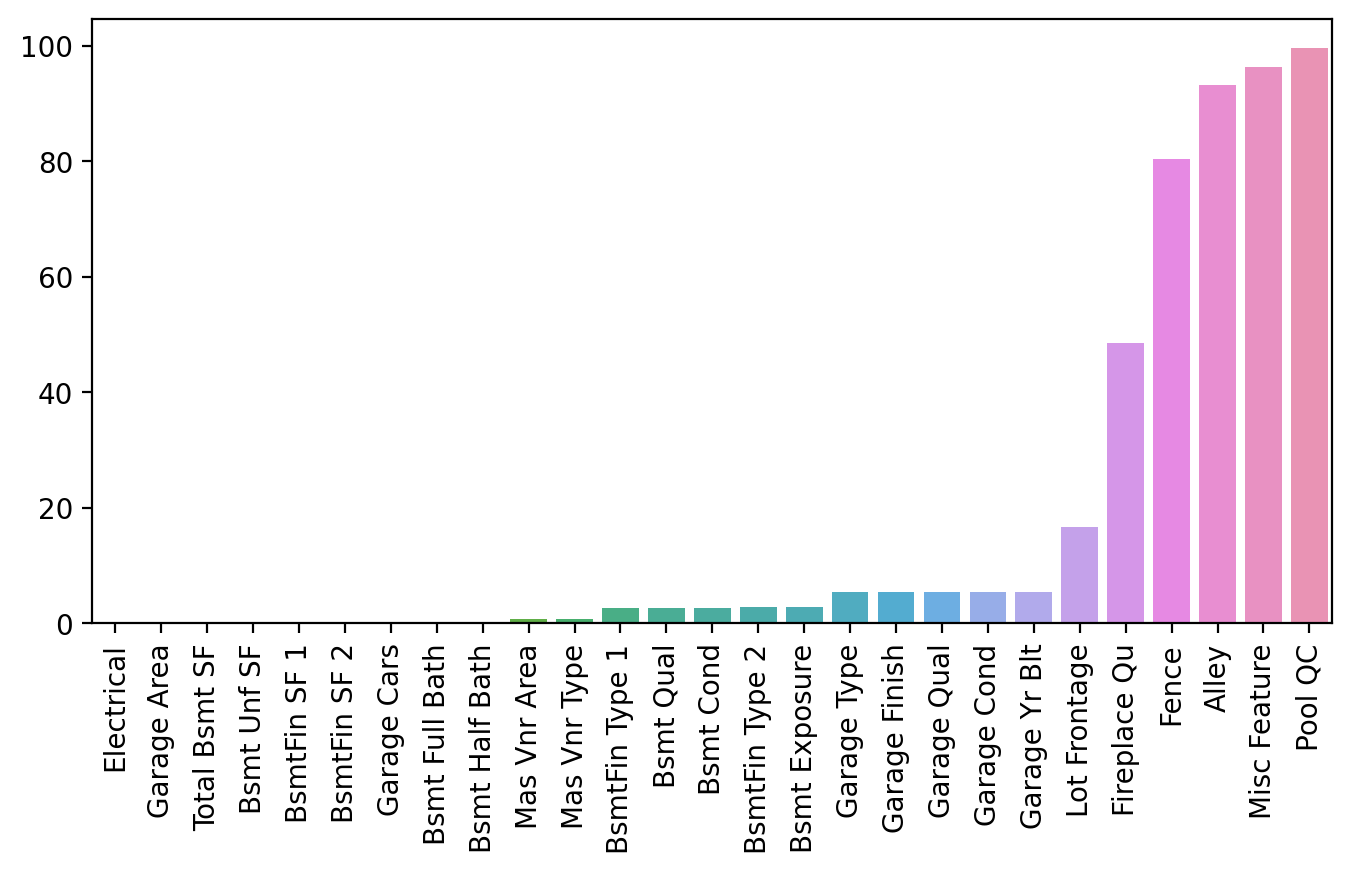

In [17]:
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)

(0.0, 1.0)

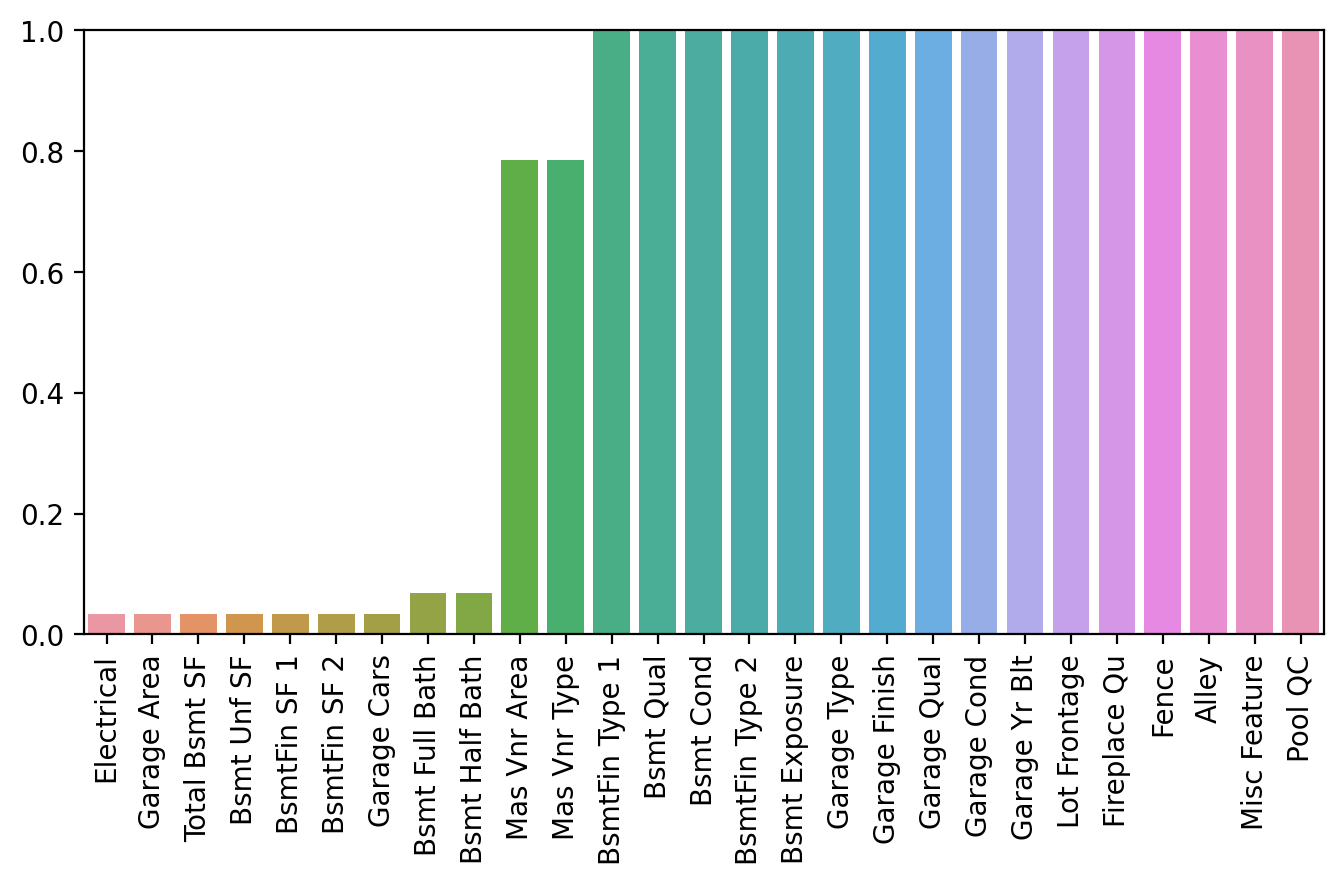

In [18]:
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)    #shows the data which has missing data less than 1%
plt.xticks(rotation=90)
plt.ylim(0,1)

In [19]:
percent_nan[percent_nan<1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [20]:
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1576,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [21]:
df=df.dropna(axis=0,subset=['Electrical','Garage Cars'])

In [22]:
percent_nan=percent_missing(df)

In [23]:
percent_nan[percent_nan<1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

(0.0, 1.0)

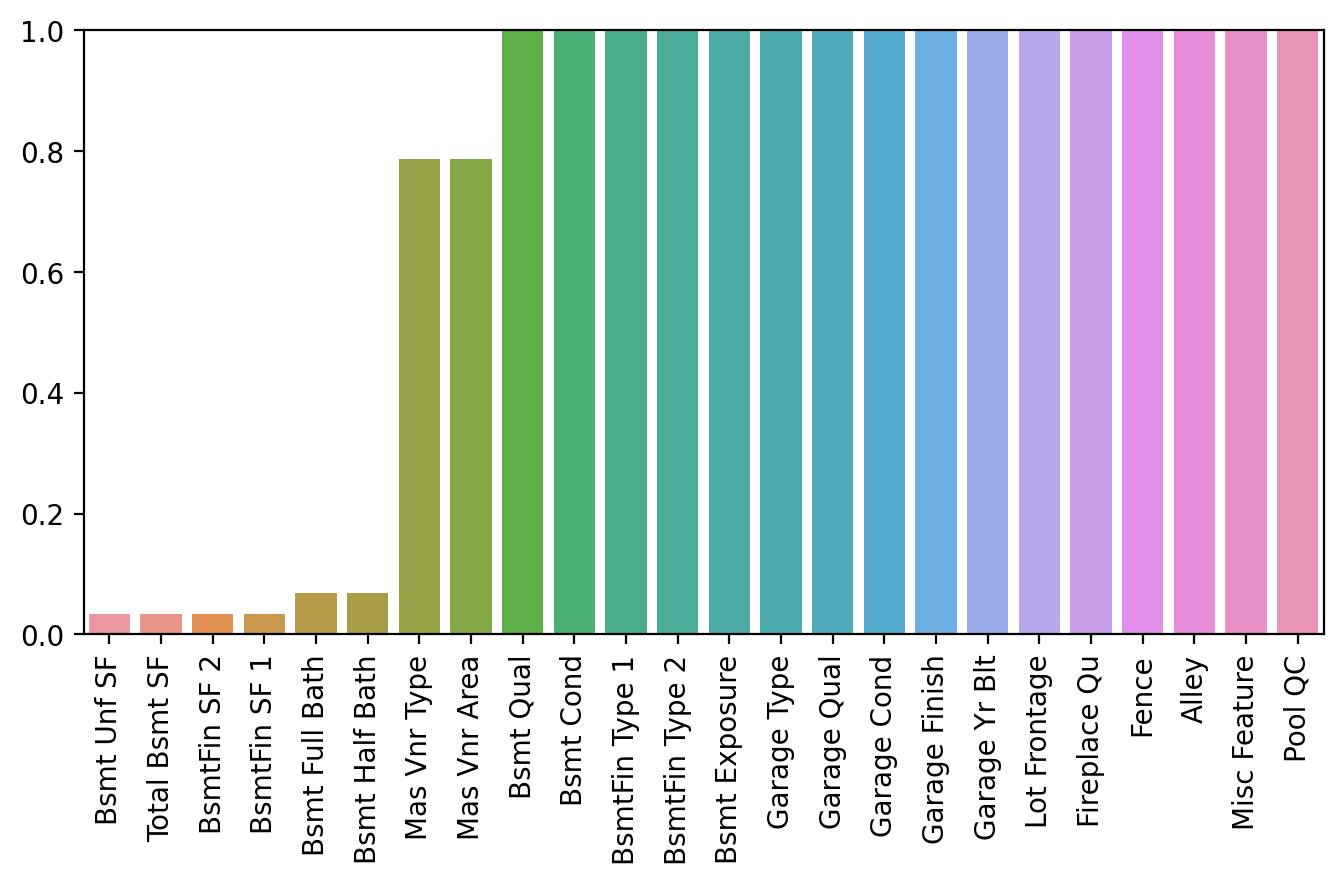

In [24]:
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)    #shows the data which has missing data less than 1%
plt.xticks(rotation=90)
plt.ylim(0,1)

In [26]:
# from above plot we can observe that some of rows are dropped
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [27]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [28]:
df[df['Bsmt Unf SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [32]:
#BSMT NUMERIC COLUMNS
bsmt_num_cols=['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']
df[bsmt_num_cols]=df[bsmt_num_cols].fillna(0)

In [33]:
#df[bsmt_num_cols]=df[bsmt_num_cols].fillna(0)

In [31]:
#BSMT String Columns
bsmt_str_cols=['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']
df[bsmt_str_cols]=df[bsmt_str_cols].fillna('None')

In [34]:
df[df['Bsmt Full Bath'].isnull()]   # can be seen 0 rows

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


(0.0, 1.0)

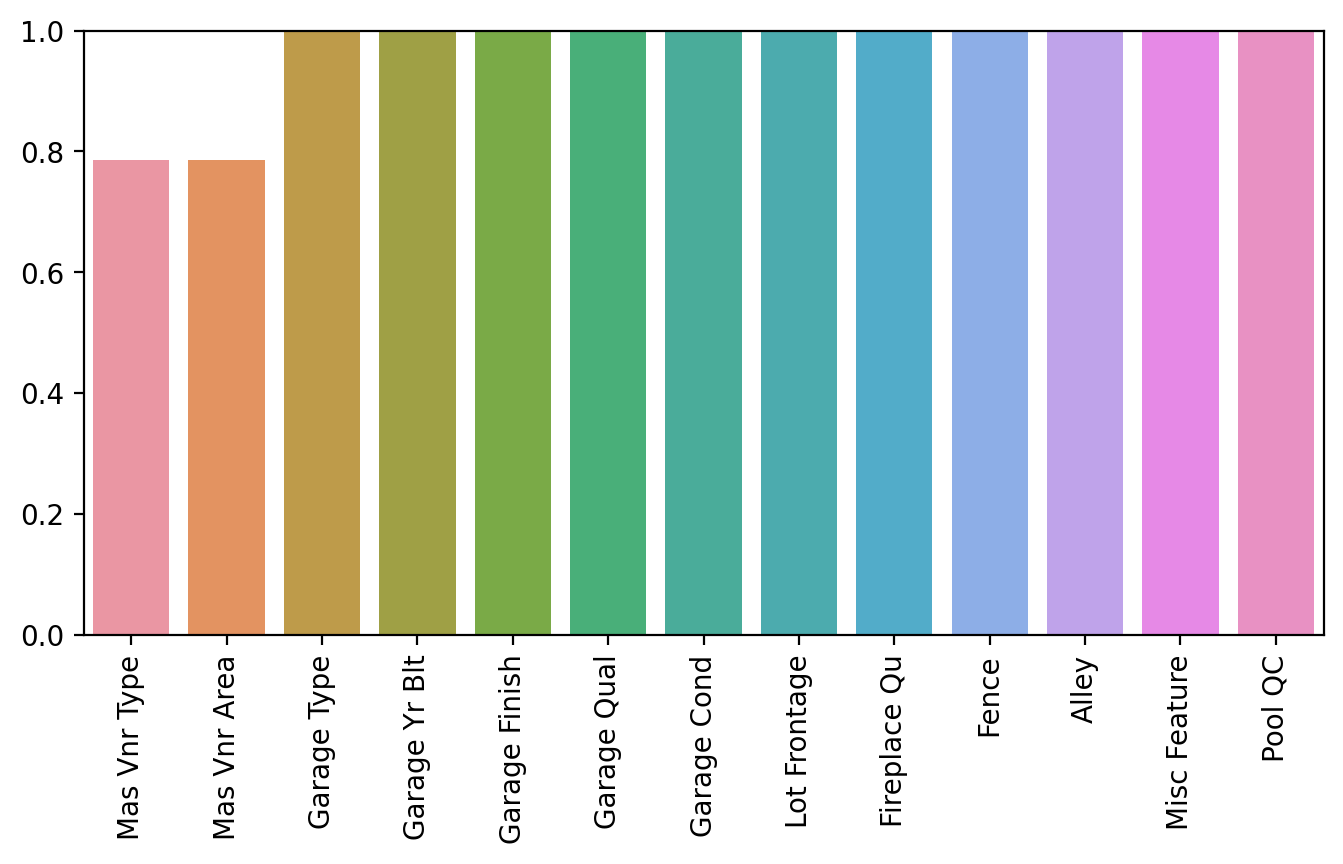

In [35]:
percent_nan=percent_missing(df)
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)    #shows the data which has missing data less than 1%
plt.xticks(rotation=90)
plt.ylim(0,1)

In [37]:
df['Mas Vnr Type']=df['Mas Vnr Type'].fillna('None')
df['Mas Vnr Area']=df['Mas Vnr Area'].fillna(0)

<ipython-input-37-5ef51c61fe43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mas Vnr Type']=df['Mas Vnr Type'].fillna('None')
<ipython-input-37-5ef51c61fe43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mas Vnr Area']=df['Mas Vnr Area'].fillna(0)


(0.0, 1.0)

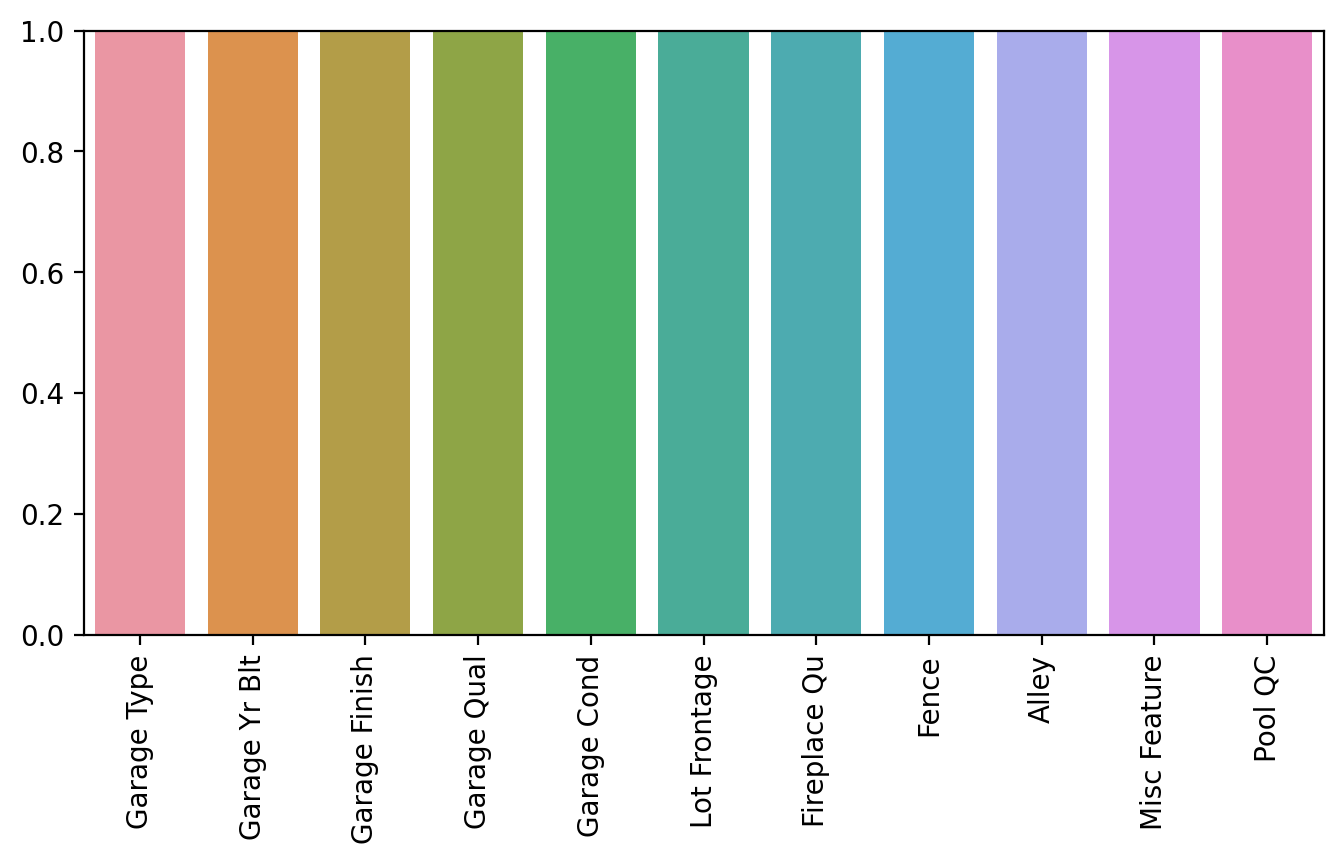

In [38]:
percent_nan=percent_missing(df)
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)    #shows the data which has missing data less than 1%
plt.xticks(rotation=90)
plt.ylim(0,1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Garage Type'),
  Text(1, 0, 'Garage Yr Blt'),
  Text(2, 0, 'Garage Finish'),
  Text(3, 0, 'Garage Qual'),
  Text(4, 0, 'Garage Cond'),
  Text(5, 0, 'Lot Frontage'),
  Text(6, 0, 'Fireplace Qu'),
  Text(7, 0, 'Fence'),
  Text(8, 0, 'Alley'),
  Text(9, 0, 'Misc Feature'),
  Text(10, 0, 'Pool QC')])

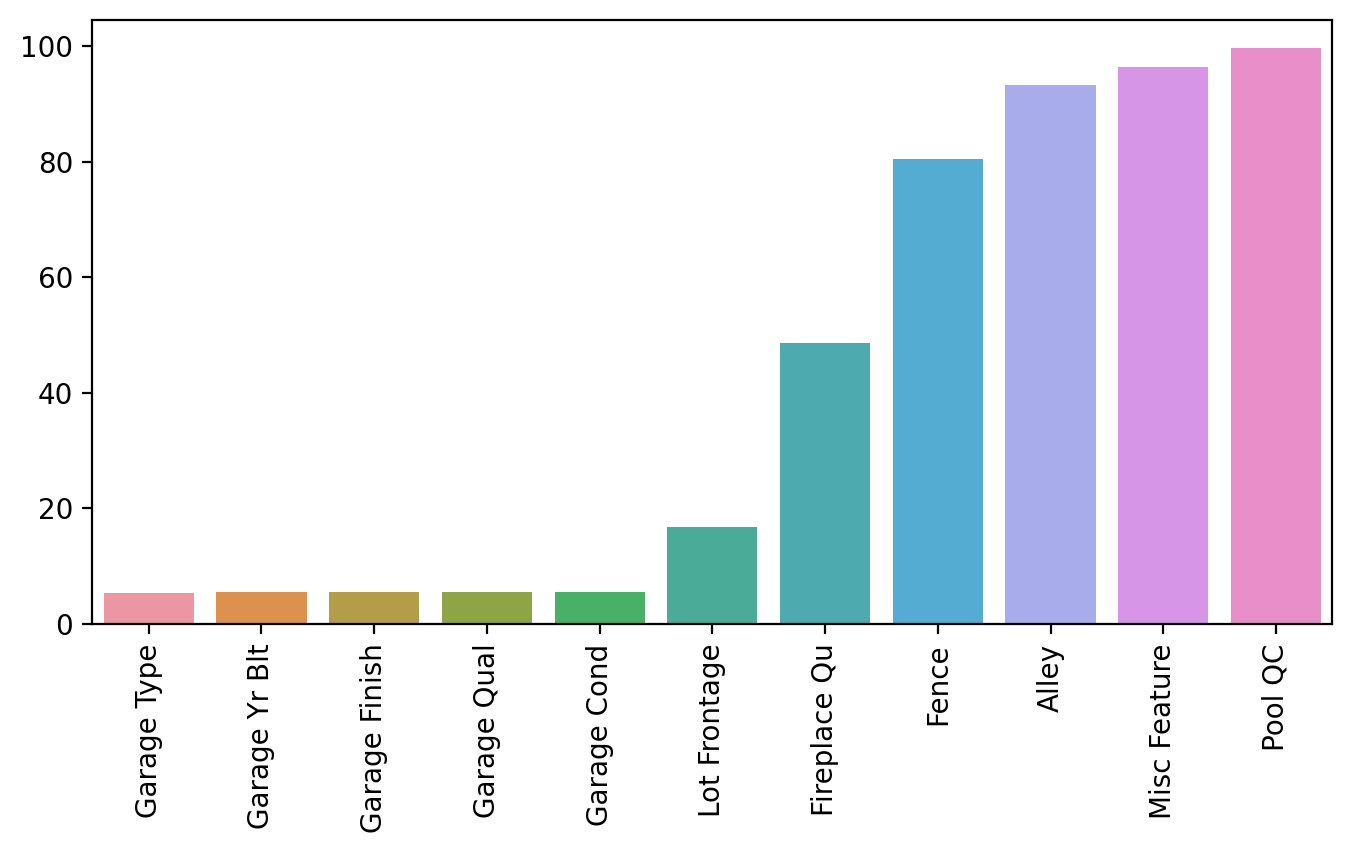

In [39]:
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)    
plt.xticks(rotation=90)

In [40]:
gar_str_cols=['Garage Type','Garage Finish','Garage Qual','Garage Cond']
df[gar_str_cols]=df[gar_str_cols].fillna('None')

C:\Users\babit\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Garage Yr Blt'),
  Text(1, 0, 'Lot Frontage'),
  Text(2, 0, 'Fireplace Qu'),
  Text(3, 0, 'Fence'),
  Text(4, 0, 'Alley'),
  Text(5, 0, 'Misc Feature'),
  Text(6, 0, 'Pool QC')])

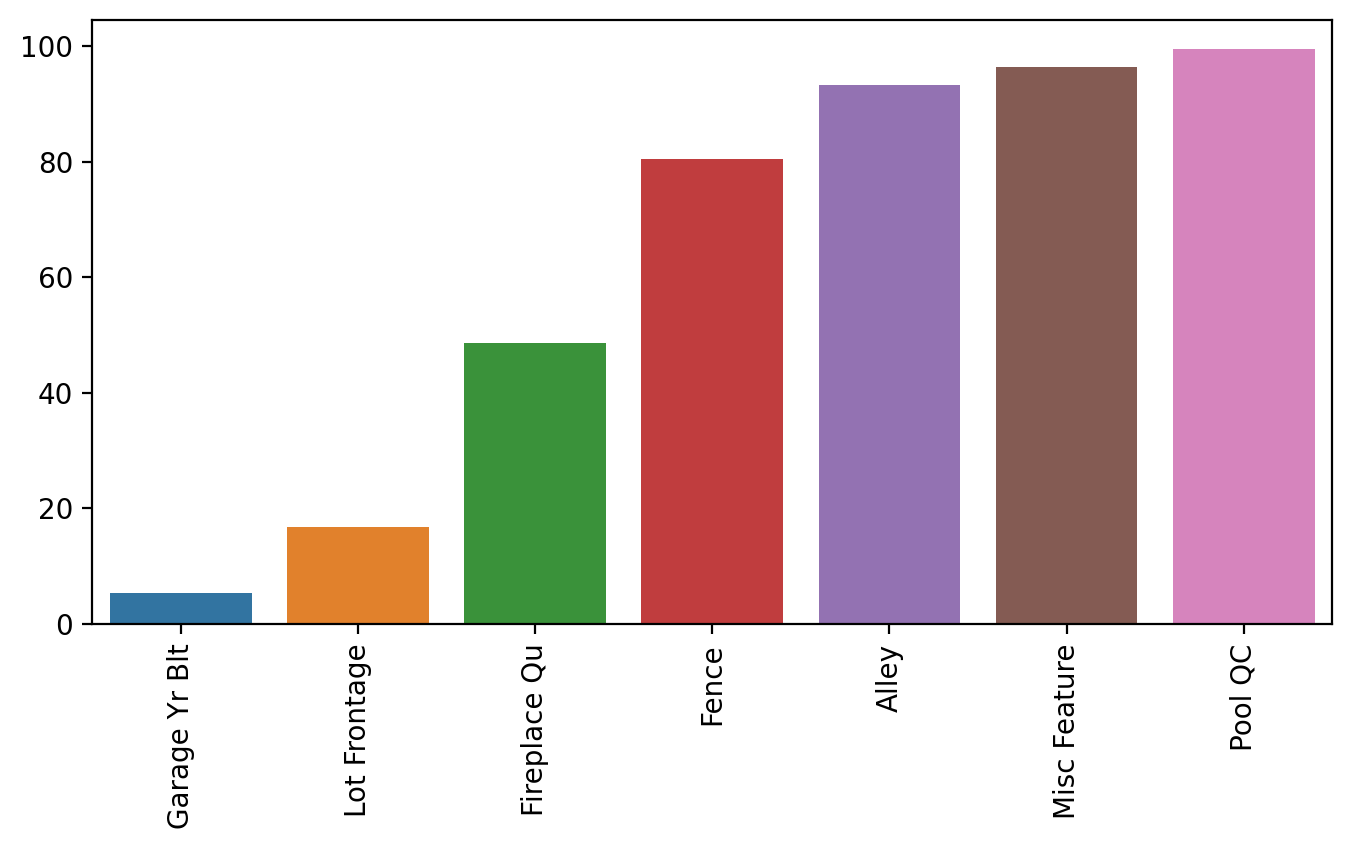

In [41]:
percent_nan=percent_missing(df)
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)    
plt.xticks(rotation=90)

In [42]:
df['Garage Yr Blt']=df['Garage Yr Blt'].fillna(0)

<ipython-input-42-45f06567e24c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Garage Yr Blt']=df['Garage Yr Blt'].fillna(0)


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Lot Frontage'),
  Text(1, 0, 'Fireplace Qu'),
  Text(2, 0, 'Fence'),
  Text(3, 0, 'Alley'),
  Text(4, 0, 'Misc Feature'),
  Text(5, 0, 'Pool QC')])

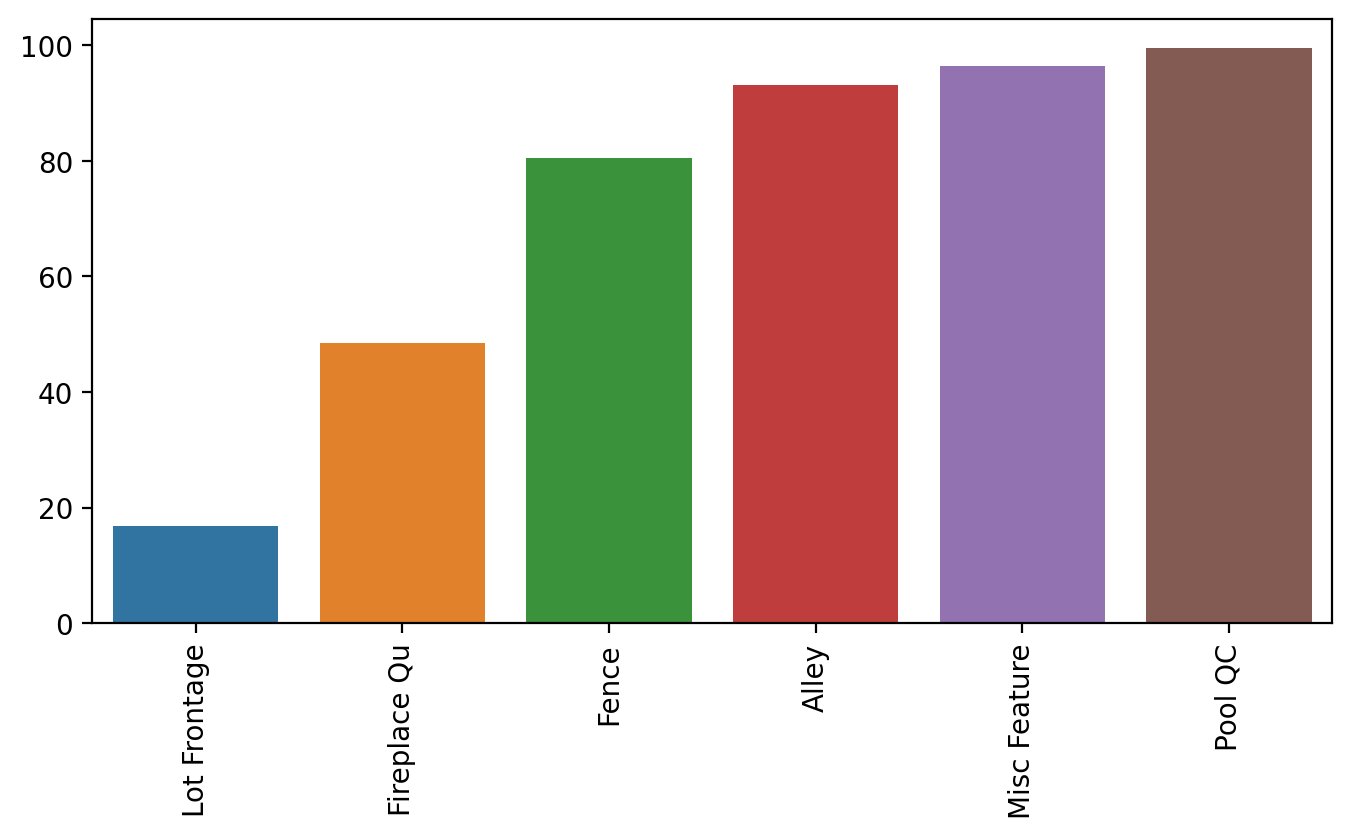

In [43]:
percent_nan=percent_missing(df)
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)    
plt.xticks(rotation=90)

In [44]:
df=df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

(array([0, 1]), [Text(0, 0, 'Lot Frontage'), Text(1, 0, 'Fireplace Qu')])

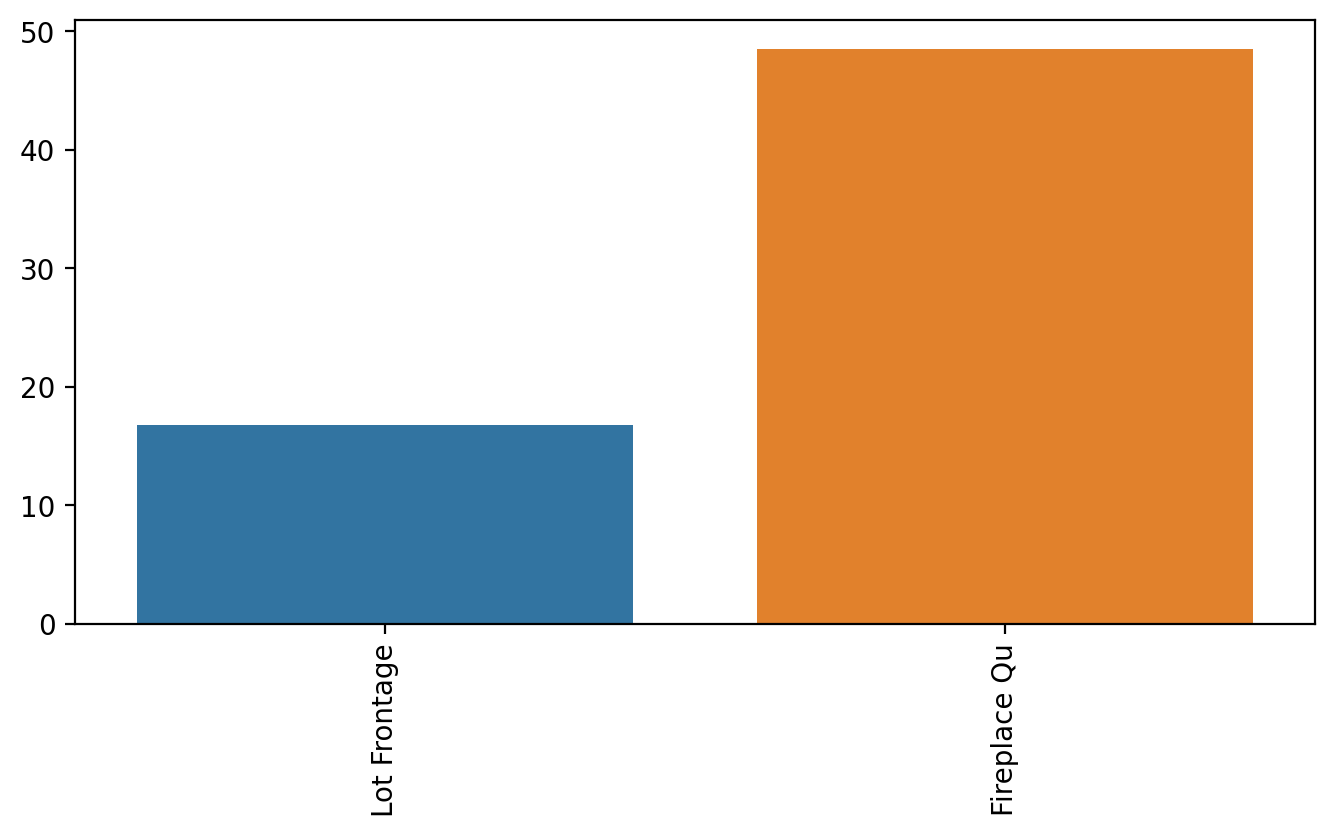

In [45]:
percent_nan=percent_missing(df)
plt.figure(figsize=(8,4),dpi=200)
sns.barplot(x=percent_nan.index,y=percent_nan)    
plt.xticks(rotation=90)

In [46]:
df['Fireplace Qu']=df['Fireplace Qu'].fillna('None')

(array([0]), [Text(0, 0, 'Lot Frontage')])

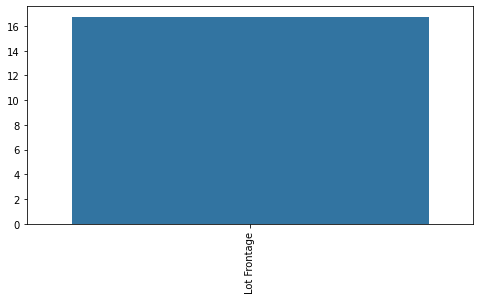

In [48]:
percent_nan=percent_missing(df)
plt.figure(figsize=(8,4))
sns.barplot(x=percent_nan.index,y=percent_nan)    
plt.xticks(rotation=90)

In [49]:
df['Lot Frontage']    #there is one None value

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2922     37.0
2923      NaN
2924     62.0
2925     77.0
2926     74.0
Name: Lot Frontage, Length: 2925, dtype: float64

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

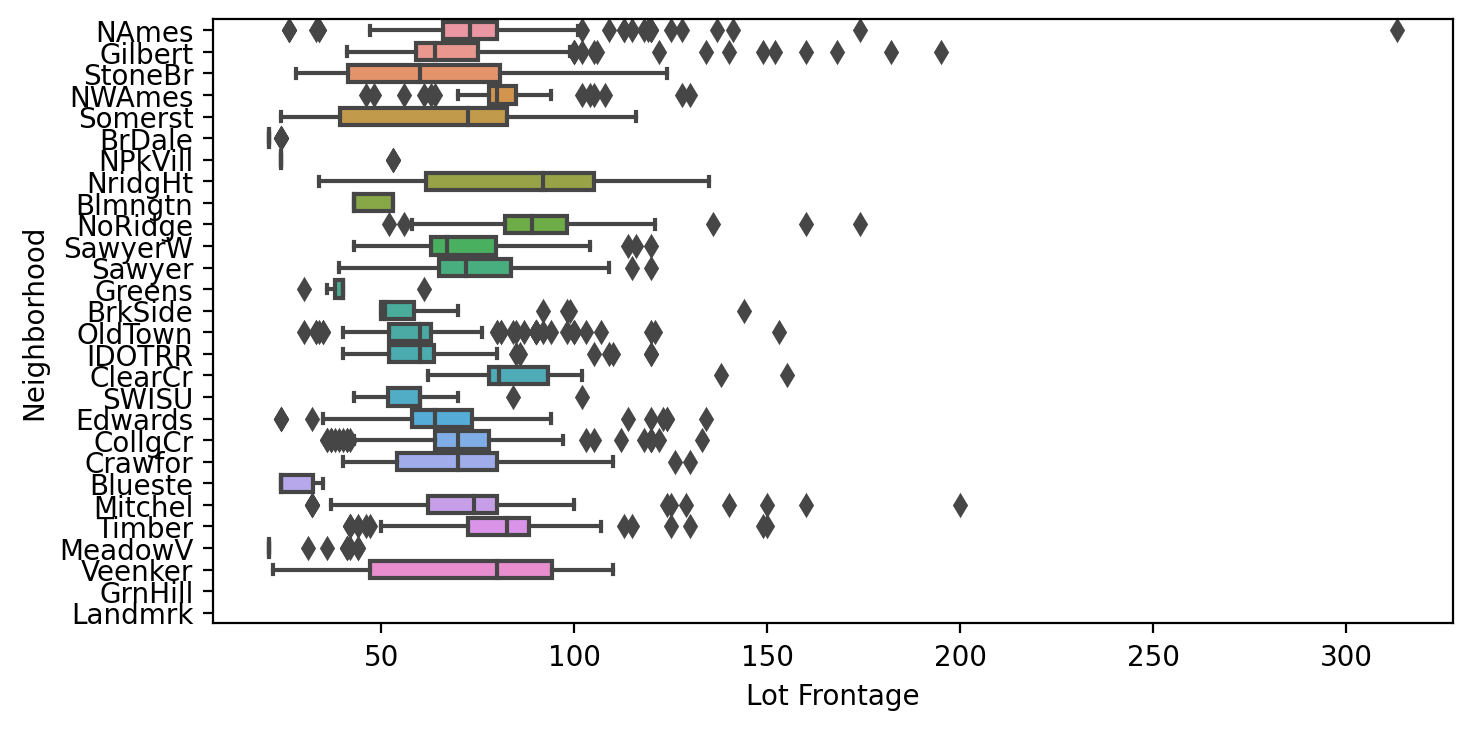

In [51]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h')

In [52]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [56]:
#df

In [64]:
#df['Lot Frontage']= df.groupby['Neighborhood']['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

In [67]:
#df.groupby['Neighborhood']['Lot Frontage']

In [70]:
#df

In [68]:
df['Lot Frontage']=df['Lot Frontage'].fillna(0)

In [69]:
df.isnull().sum()                  # now there is no Missing Data

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [72]:
percent_nan=percent_missing(df)

In [73]:
percent_nan

Series([], dtype: float64)